Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good
idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

#### IMPORTING THE DATA

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [337]:
bike = pd.read_csv('day.csv')

In [338]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### *Sanity check for the data

In [339]:
bike.shape

(730, 16)

In [340]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [341]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [342]:
bike.size

11680

In [343]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [344]:
bike.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [345]:
bike.ndim

2

In [346]:
bike.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [347]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [348]:
# renaming few columns for better readibility

bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [349]:
bike.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        1           1   
1        2  02-01-2018       1     0      1        0        2           1   
2        3  03-01-2018       1     0      1        0        3           1   
3        4  04-01-2018       1     0      1        0        4           1   
4        5  05-01-2018       1     0      1        0        5           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [350]:
# dropping the duplicates

bike.drop_duplicates(inplace=True)

In [351]:
bike.shape

(730, 16)

The shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

Data Cleaning  

# dropping the unwanted columns

In [352]:
# casual and registered variables are not available at the time of prediction and also these things will describe that the target variable is cnt . So target = casual + registered, which leads to data leakage stating that sum of the both casual + registered is the target variable . Also to avoid multicollinearity we delete the columns 'casual' and 'registered'.

In [353]:
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

### Renaming of columns

In [354]:
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [355]:
bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [356]:
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [357]:
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [358]:
bike.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     mon           1      Misty  14.110847   
1  spring     0   jan        0     tue           1      Misty  14.902598   
2  spring     0   jan        0     wed           1      Clear   8.050924   
3  spring     0   jan        0     thu           1      Clear   8.200000   
4  spring     0   jan        0     fri           1      Clear   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600

###  Identifying Outliners

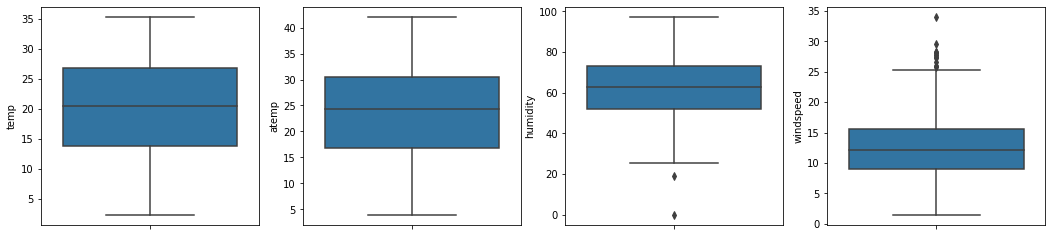

In [359]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

In [360]:
# As we can observe the plots, there are no outliers.

## Data Visualisation and Data Preparation

#### Analysing the categorical columns

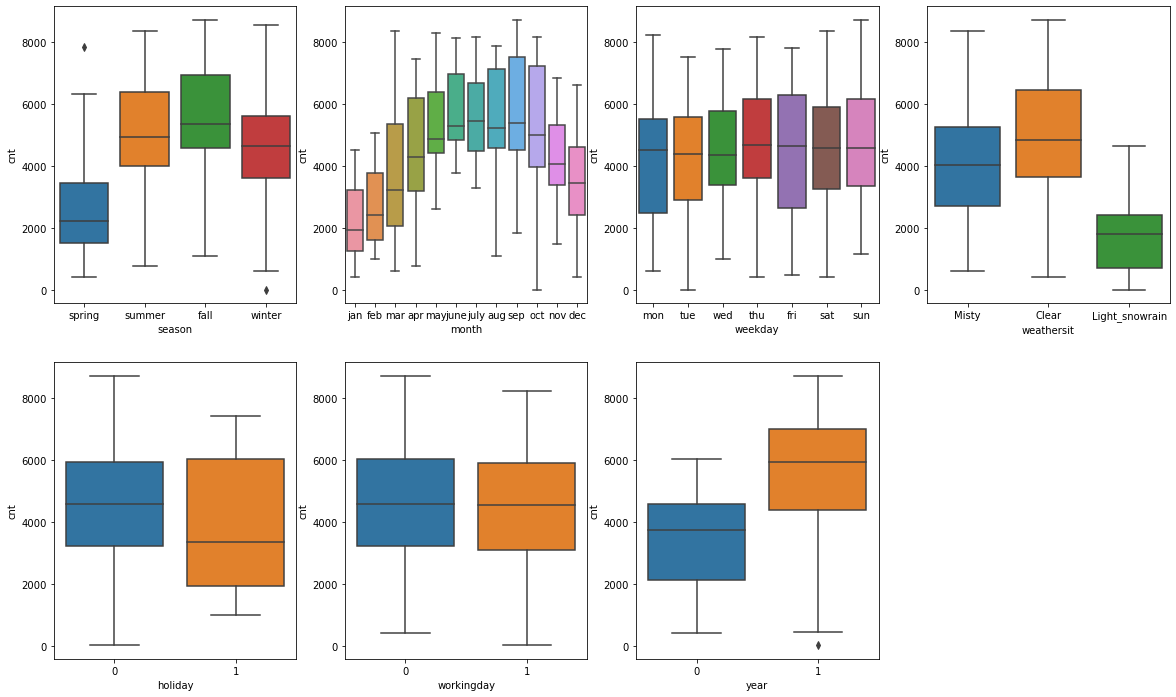

In [361]:

# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike)
plt.show() 

## Univariate Analysis
### categorical against the target variable

Target variable

Text(0.5, 0, 'Temperature')

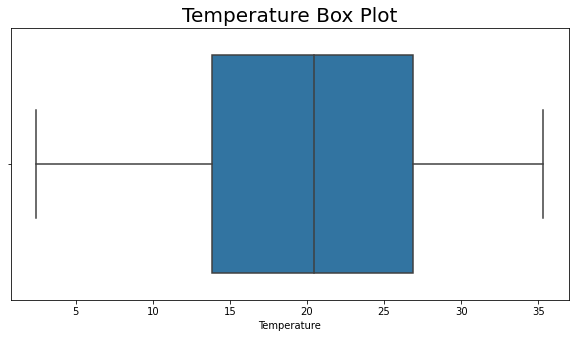

In [362]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=bike, x='temp')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize':10})

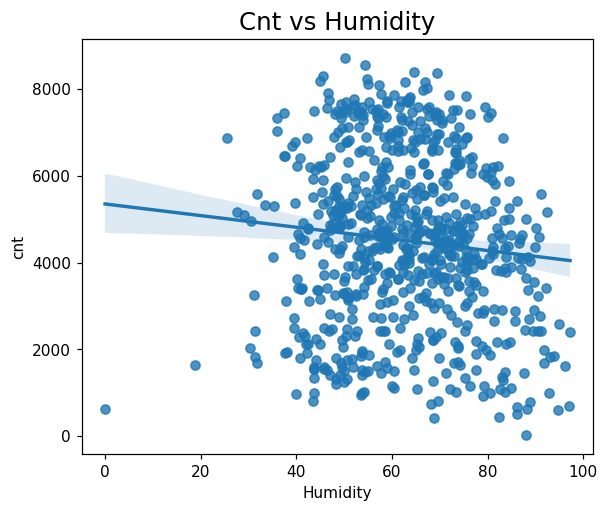

In [363]:
# univariate Analysis for Cnt vs Hum
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Humidity",fontsize=16)
sns.regplot(data=bike,y="cnt",x="humidity")
plt.xlabel("Humidity")
plt.show()

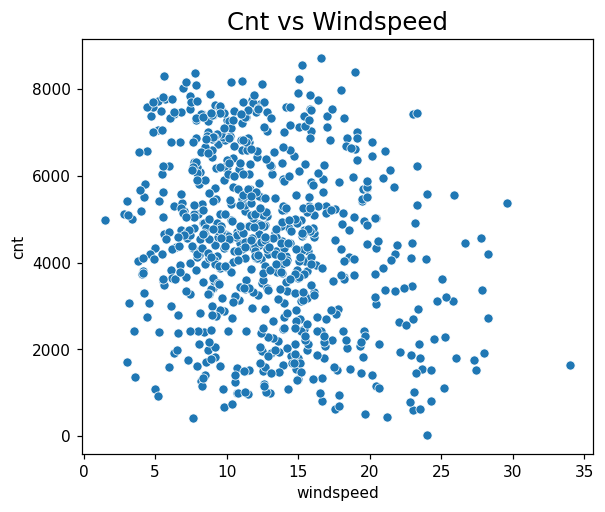

In [364]:
# univariate Analysis for Cnt vs Windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.scatterplot(data=bike,y="cnt",x="windspeed")
plt.show()

### Bivariate Analysis

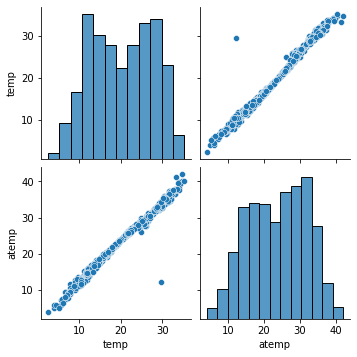

In [365]:
sns.pairplot(bike[['temp','atemp']])
plt.show()

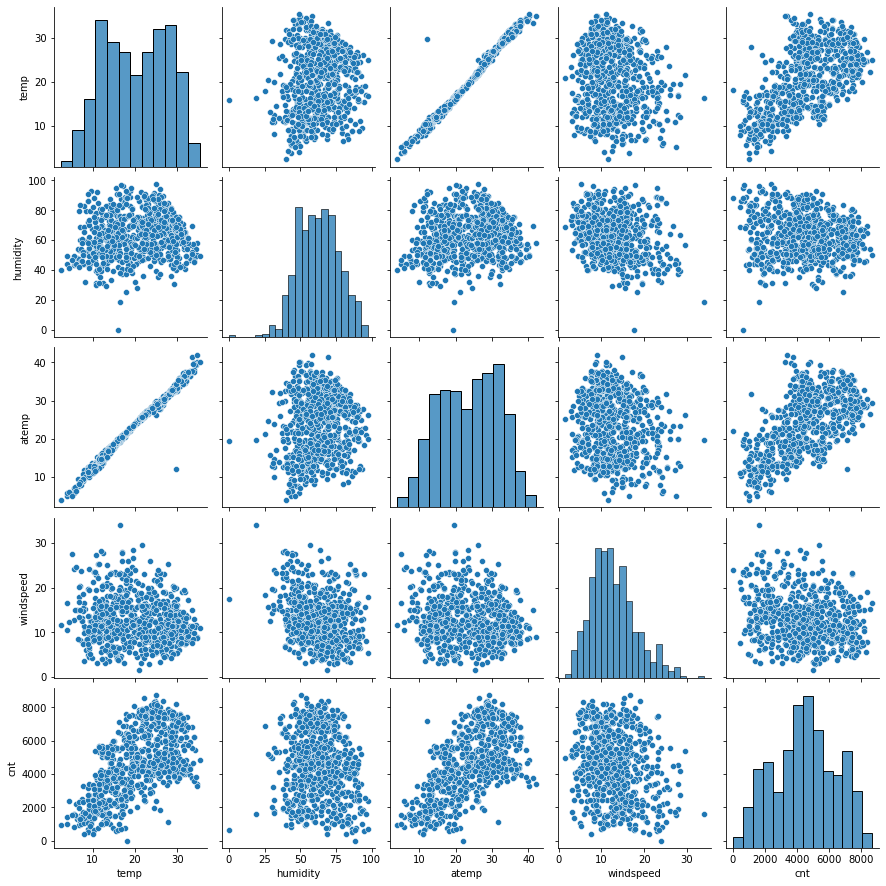

In [366]:
# Pairplot of numerical variables

sns.pairplot(bike, vars=['temp','humidity','atemp','windspeed',"cnt"])
plt.show()

Findings:
Season: Most of the bike booking were happening in season 2 and season 3 with a median of over 5000 booking. This indicates, season can be a good predictor for the dependent variable.

Month: Most bike booking were happening in the months 5,6,7,8,9 & 10 with a median of over 4000 booking per month. This indicates, month has some trend for bookings and can be a good predictor for the dependent variable.

Weathersit: Most of the bike booking were happening during weathersit1 with a median of close to 5000 booking followed by weathersit2 with median above 4000 .This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

Holiday: Most of the bike booking were happening when it is not a holiday. This indicates, holiday can't be a good predictor for the dependent variable for increasing bookings.

Weekday: weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor.

Working-day: Almost 69% of the bike booking were happening in ‘working-day’ with a median of close to 5000 booking (for the period of 2 years). This indicates, working-day can be a good predictor for the dependent variable

year: 2019 is clearly a better year the bike booking. This indicates it could be useful.

### Correlation between variables

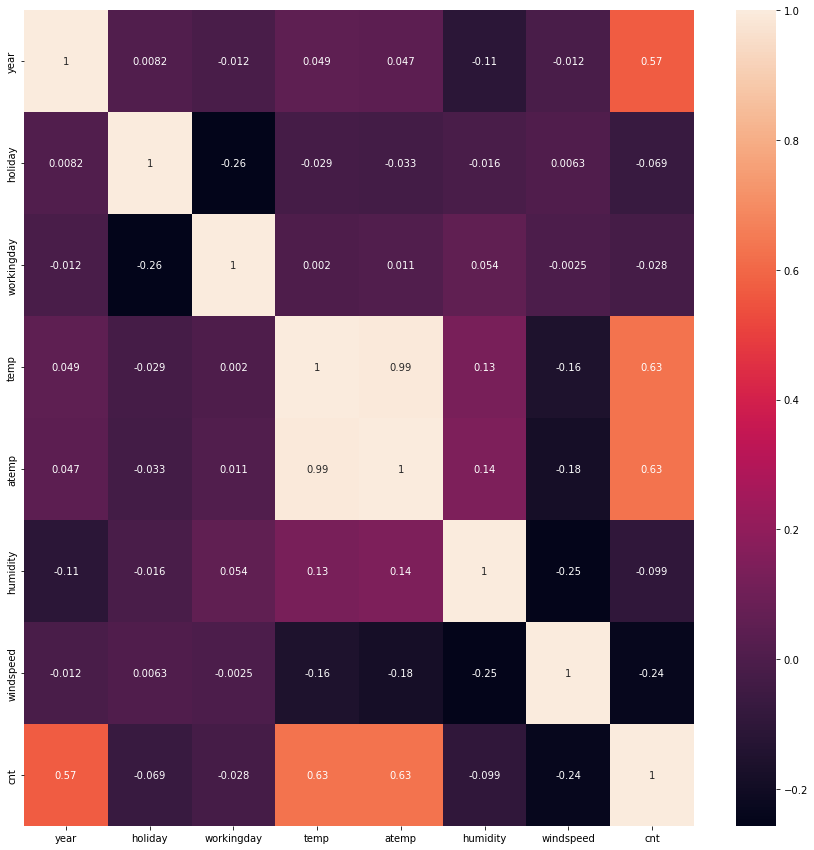

In [367]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(bike.corr(), annot = True)
plt.show()

Findings:
There is a correlation of 0.63 between cnt-temp and cnt-atemp
There is a correlation of 0.99 between temp and atemp

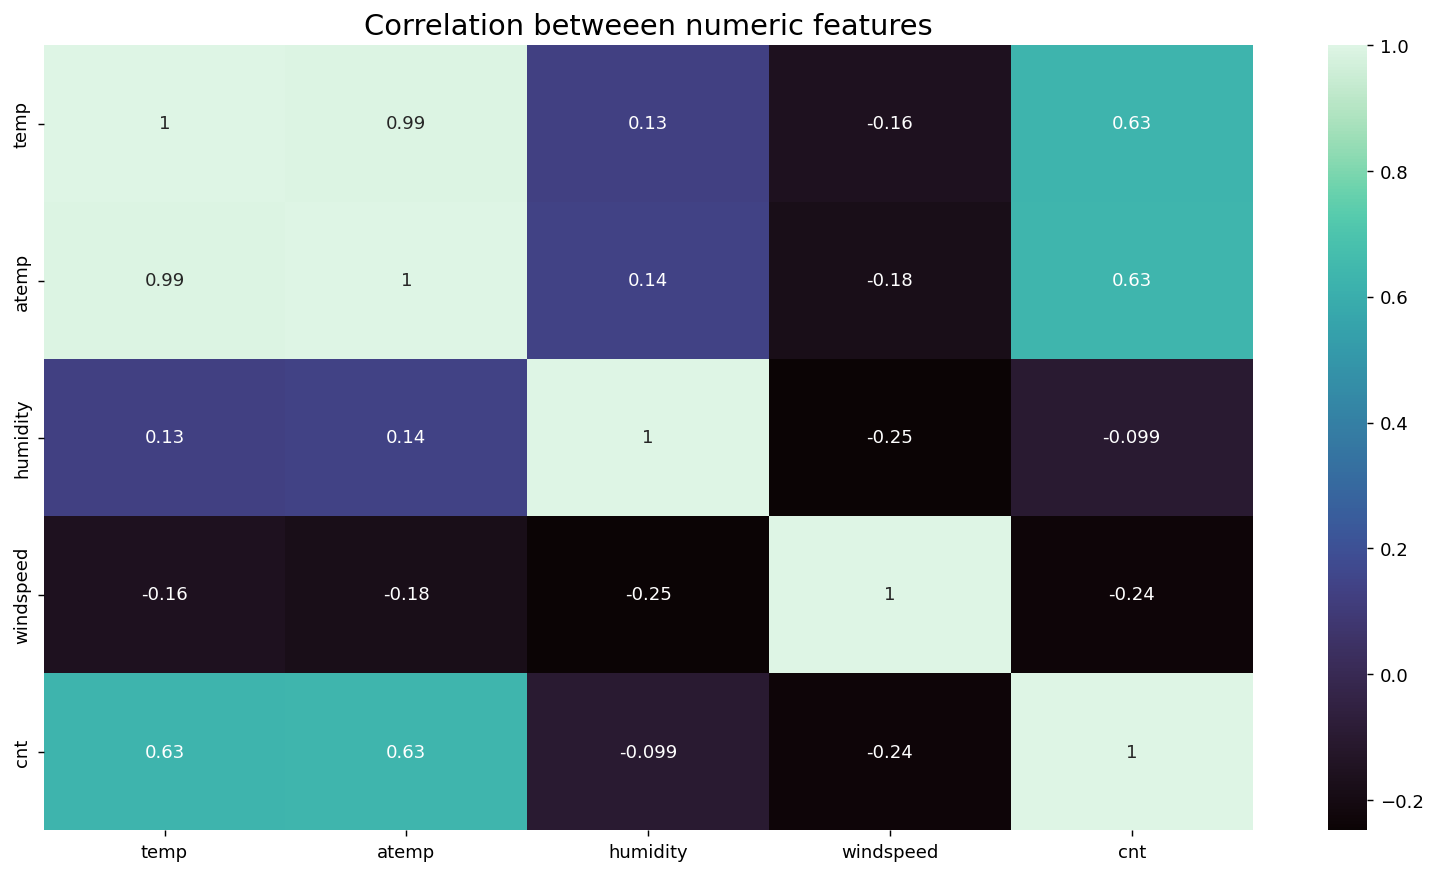

In [368]:
num_features = ["temp","atemp","humidity","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bike[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [369]:
bike.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.462641    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt  
count  730.000000   730.000000  
mean    12.763620  4508.006849  
std      5.195841  1936.011647  
min      1.500244    22.000000  
25%      9.041650  3169.750000  
50%     12.125325  4548.500000  
75%     15.625589  5966.000000  
max     34.000021  8714.000000

## Data preparation for linear regression

#### Dummy variable creation 
creating dummy variable for month, weekday, weathersit and season variables.

In [371]:
bike['month']=bike['month'].astype('category')
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['weekday']=bike['weekday'].astype('category')
bike['cnt']=bike['cnt'].astype('float')
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    float64 
dtypes: category(4), float64(5), int64(3)
memory usage: 71.4 KB


In [372]:
bike['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: category
Categories (4, object): ['fall', 'spring', 'summer', 'winter']

In [373]:
bike['weathersit']

0      Misty
1      Misty
2      Clear
3      Clear
4      Clear
       ...  
725    Misty
726    Misty
727    Misty
728    Clear
729    Misty
Name: weathersit, Length: 730, dtype: category
Categories (3, object): ['Clear', 'Light_snowrain', 'Misty']

In [374]:
bike['weekday']

0      mon
1      tue
2      wed
3      thu
4      fri
      ... 
725    fri
726    sat
727    sun
728    mon
729    tue
Name: weekday, Length: 730, dtype: category
Categories (7, object): ['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

In [375]:
bike['month']

0      jan
1      jan
2      jan
3      jan
4      jan
      ... 
725    dec
726    dec
727    dec
728    dec
729    dec
Name: month, Length: 730, dtype: category
Categories (12, object): ['apr', 'aug', 'dec', 'feb', ..., 'may', 'nov', 'oct', 'sep']

In [554]:
bike['cnt']

0       985.0
1       801.0
2      1349.0
3      1562.0
4      1600.0
        ...  
725    2114.0
726    3095.0
727    1341.0
728    1796.0
729    2729.0
Name: cnt, Length: 730, dtype: float64

In [377]:
# convert categorical variable into dummy/indicator variables 
Season_Condition=pd.get_dummies(bike['season'],drop_first=True)
Weather_Condition=pd.get_dummies(bike['weathersit'],drop_first=True)
DayOfWeek=pd.get_dummies(bike['weekday'],drop_first=True)
Month_Name=pd.get_dummies(bike['month'],drop_first=True)

In [378]:
bike_new = pd.concat([bike,Month_Name,DayOfWeek,Weather_Condition,Season_Condition],axis=1)

In [379]:
bike_new.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     mon           1      Misty  14.110847   
1  spring     0   jan        0     tue           1      Misty  14.902598   
2  spring     0   jan        0     wed           1      Clear   8.050924   
3  spring     0   jan        0     thu           1      Clear   8.200000   
4  spring     0   jan        0     fri           1      Clear   9.305237   

      atemp  humidity  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
0  18.18125   80.5833  ...    0    0    0    0    0               0      1   
1  17.68695   69.6087  ...    0    0    0    1    0               0      1   
2   9.47025   43.7273  ...    0    0    0    0    1               0      0   
3  10.60610   59.0435  ...    0    0    1    0    0               0      0   
4  11.46350   43.6957  ...    0    0    0    0    0               0      0   

   spring  summer  winter  
0       1       0       0  
1       1       0       0  
2       1       0       0  
3       1       0       0  
4       1       0       0  

[5 rows x 34 columns]

In [380]:
bike_new.shape

(730, 34)

In [381]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   season          730 non-null    category
 1   year            730 non-null    int64   
 2   month           730 non-null    category
 3   holiday         730 non-null    int64   
 4   weekday         730 non-null    category
 5   workingday      730 non-null    int64   
 6   weathersit      730 non-null    category
 7   temp            730 non-null    float64 
 8   atemp           730 non-null    float64 
 9   humidity        730 non-null    float64 
 10  windspeed       730 non-null    float64 
 11  cnt             730 non-null    float64 
 12  aug             730 non-null    uint8   
 13  dec             730 non-null    uint8   
 14  feb             730 non-null    uint8   
 15  jan             730 non-null    uint8   
 16  july            730 non-null    uint8   
 17  june            

In [382]:
bike_new.dtypes

season            category
year                 int64
month             category
holiday              int64
weekday           category
workingday           int64
weathersit        category
temp               float64
atemp              float64
humidity           float64
windspeed          float64
cnt                float64
aug                  uint8
dec                  uint8
feb                  uint8
jan                  uint8
july                 uint8
june                 uint8
mar                  uint8
may                  uint8
nov                  uint8
oct                  uint8
sep                  uint8
mon                  uint8
sat                  uint8
sun                  uint8
thu                  uint8
tue                  uint8
wed                  uint8
Light_snowrain       uint8
Misty                uint8
spring               uint8
summer               uint8
winter               uint8
dtype: object

<Figure size 1440x1080 with 0 Axes>

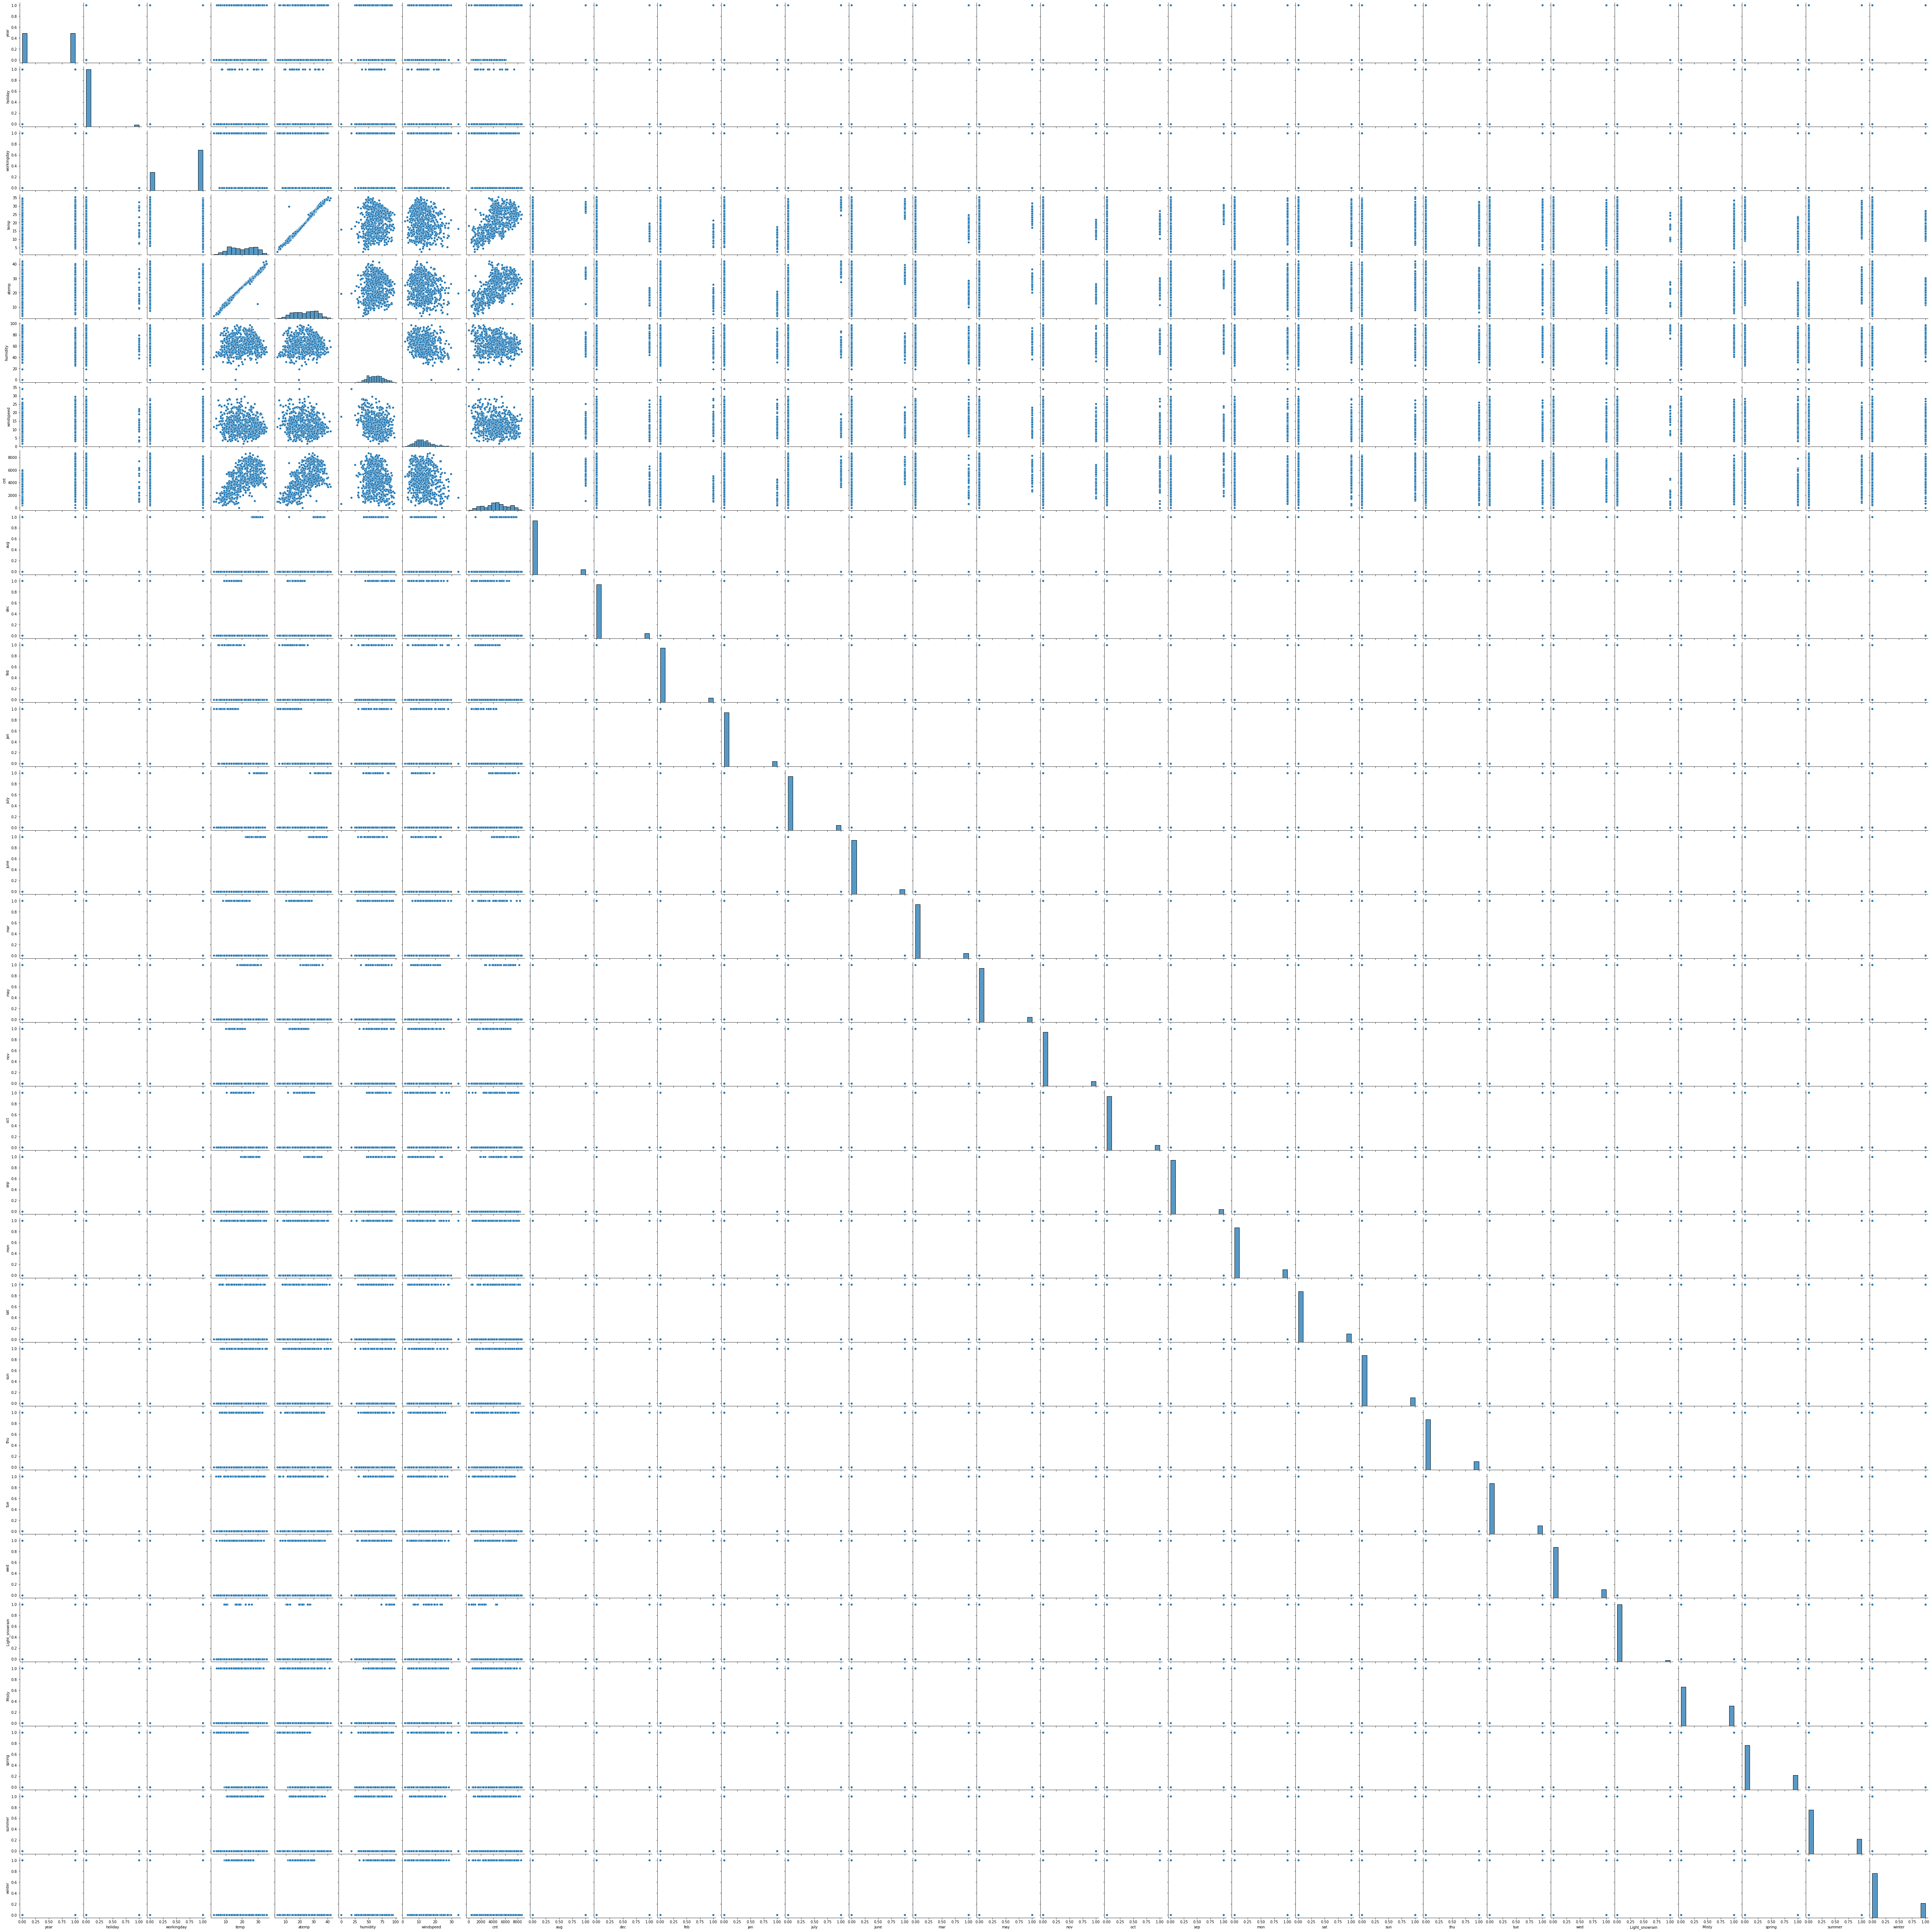

In [383]:
plt.figure(figsize=(20,15))
sns.pairplot(bike_new)
plt.show()

In [384]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bike_new)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bike_new, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

In [385]:
bike=pd.concat([bike,Season_Condition],axis=1)
bike=pd.concat([bike,Weather_Condition],axis=1)
bike=pd.concat([bike,DayOfWeek],axis=1)
bike=pd.concat([bike,Month_Name],axis=1)

In [386]:
bike.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     mon           1      Misty  14.110847   
1  spring     0   jan        0     tue           1      Misty  14.902598   
2  spring     0   jan        0     wed           1      Clear   8.050924   
3  spring     0   jan        0     thu           1      Clear   8.200000   
4  spring     0   jan        0     fri           1      Clear   9.305237   

      atemp  humidity  ...  dec  feb  jan  july  june  mar  may  nov  oct  sep  
0  18.18125   80.5833  ...    0    0    1     0     0    0    0    0    0    0  
1  17.68695   69.6087  ...    0    0    1     0     0    0    0    0    0    0  
2   9.47025   43.7273  ...    0    0    1     0     0    0    0    0    0    0  
3  10.60610   59.0435  ...    0    0    1     0     0    0    0    0    0    0  
4  11.46350   43.6957  ...    0    0    1     0     0    0    0    0    0    0  

[5 rows x 34 columns]

In [387]:
bike.drop(['season'],axis=1,inplace=True)
bike.drop(['weathersit'],axis=1,inplace=True)
bike.drop(['weekday'],axis=1,inplace=True)
bike.drop(['month'],axis=1,inplace=True)

bike.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  \
0     0        0           1  14.110847  18.18125   80.5833  10.749882   
1     0        0           1  14.902598  17.68695   69.6087  16.652113   
2     0        0           1   8.050924   9.47025   43.7273  16.636703   
3     0        0           1   8.200000  10.60610   59.0435  10.739832   
4     0        0           1   9.305237  11.46350   43.6957  12.522300   

      cnt  spring  summer  ...  dec  feb  jan  july  june  mar  may  nov  oct  \
0   985.0       1       0  ...    0    0    1     0     0    0    0    0    0   
1   801.0       1       0  ...    0    0    1     0     0    0    0    0    0   
2  1349.0       1       0  ...    0    0    1     0     0    0    0    0    0   
3  1562.0       1       0  ...    0    0    1     0     0    0    0    0    0   
4  1600.0       1       0  ...    0    0    1     0     0    0    0    0    0   

   sep  
0    0  
1    0  
2    0  
3    0  
4    0  

[5 rows x 30 columns]

## Data Splitting

Here, we will split the data into 2 parts
* Train Data (On which model will be build and is almost 80% of total data)
* Test Data (On which build model will be tested and is almost 20% of total data)

### Train - Test Split

In [388]:
# importing statsmodel and sklearn libraries for Linear regression model building

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [390]:
bike_train, bike_test = train_test_split(bike, train_size=0.8,test_size=0.2,random_state=1000)

In [391]:
bike_train.shape

(584, 30)

In [392]:
bike_test.shape

(146, 30)

In [393]:
bike_train.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  \
269     0        0           1  26.103347  28.72625   88.5417   7.917457   
427     1        0           1  13.359153  15.15105   40.3333  22.416257   
630     1        0           1  21.695847  25.94665   46.7083  14.958286   
696     1        0           1  12.163347  14.48810   50.6250  14.125007   
188     0        0           0  29.075847  33.52415   75.7917  15.083643   

        cnt  spring  summer  ...  dec  feb  jan  july  june  mar  may  nov  \
269  4120.0       0       0  ...    0    0    0     0     0    0    0    0   
427  3423.0       1       0  ...    0    0    0     0     0    1    0    0   
630  7907.0       0       0  ...    0    0    0     0     0    0    0    0   
696  5260.0       0       0  ...    0    0    0     0     0    0    0    1   
188  4040.0       0       0  ...    0    0    0     1     0    0    0    0   

     oct  sep  
269    0    1  
427    0    0  
630    0    1  
696    0    0  
188    0    0  

[5 rows x 30 columns]

In [394]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 269 to 435
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            584 non-null    int64  
 1   holiday         584 non-null    int64  
 2   workingday      584 non-null    int64  
 3   temp            584 non-null    float64
 4   atemp           584 non-null    float64
 5   humidity        584 non-null    float64
 6   windspeed       584 non-null    float64
 7   cnt             584 non-null    float64
 8   spring          584 non-null    uint8  
 9   summer          584 non-null    uint8  
 10  winter          584 non-null    uint8  
 11  Light_snowrain  584 non-null    uint8  
 12  Misty           584 non-null    uint8  
 13  mon             584 non-null    uint8  
 14  sat             584 non-null    uint8  
 15  sun             584 non-null    uint8  
 16  thu             584 non-null    uint8  
 17  tue             584 non-null    u

In [395]:
bike_test.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  \
310     0        0           1  16.195000  20.04355   75.8750   3.834075   
320     0        0           0  14.008347  16.16105   57.5833  20.459254   
189     0        0           1  30.066653  33.20790   60.9167  11.250104   
382     1        0           1  12.436653  13.76270   44.3333  27.833743   
388     1        0           1  14.042500  17.45540   83.5833   8.292389   

        cnt  spring  summer  ...  dec  feb  jan  july  june  mar  may  nov  \
310  4035.0       0       0  ...    0    0    0     0     0    0    0    1   
320  3053.0       0       0  ...    0    0    0     0     0    0    0    1   
189  5336.0       0       0  ...    0    0    0     1     0    0    0    0   
382  3376.0       1       0  ...    0    0    1     0     0    0    0    0   
388  4339.0       1       0  ...    0    0    1     0     0    0    0    0   

     oct  sep  
310    0    0  
320    0    0  
189    0    0  
382    0    0  
388    0    0  

[5 rows x 30 columns]

In [396]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 310 to 608
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            146 non-null    int64  
 1   holiday         146 non-null    int64  
 2   workingday      146 non-null    int64  
 3   temp            146 non-null    float64
 4   atemp           146 non-null    float64
 5   humidity        146 non-null    float64
 6   windspeed       146 non-null    float64
 7   cnt             146 non-null    float64
 8   spring          146 non-null    uint8  
 9   summer          146 non-null    uint8  
 10  winter          146 non-null    uint8  
 11  Light_snowrain  146 non-null    uint8  
 12  Misty           146 non-null    uint8  
 13  mon             146 non-null    uint8  
 14  sat             146 non-null    uint8  
 15  sun             146 non-null    uint8  
 16  thu             146 non-null    uint8  
 17  tue             146 non-null    u

In [397]:
# importing MinMaxScaler for rescalling 

from sklearn.preprocessing import MinMaxScaler

In [398]:
scaler = MinMaxScaler()

Columns are Numerical which needs to be Normalised: Date, Temperature, Humidity, Windspeed

In [399]:
numerical_variables = ['temp', 'humidity', 'windspeed']

In [400]:
bike_train[numerical_variables] = scaler.fit_transform(bike_train[numerical_variables])
bike_train.head(10)

year  holiday  workingday      temp     atemp  humidity  windspeed  \
269     0        0           1  0.705938  28.72625  0.912409   0.197454   
427     1        0           1  0.299696  15.15105  0.415629   0.643574   
630     1        0           1  0.565442  25.94665  0.481322   0.414096   
696     1        0           1  0.261578  14.48810  0.521683   0.388457   
188     0        0           0  0.800691  33.52415  0.781022   0.417954   
513     1        0           1  0.818117  33.64960  0.705452   0.562821   
318     0        0           1  0.566531  25.37895  0.709746   0.365392   
579     1        0           0  0.874751  36.14335  0.662087   0.398705   
79      0        0           1  0.436405  20.48675  0.759870   0.549180   
322     0        0           1  0.304054  16.22415  0.517389   0.416649   

        cnt  spring  summer  ...  dec  feb  jan  july  june  mar  may  nov  \
269  4120.0       0       0  ...    0    0    0     0     0    0    0    0   
427  3423.0       1       0  ...    0    0    0     0     0    1    0    0   
630  7907.0       0       0  ...    0    0    0     0     0    0    0    0   
696  5260.0       0       0  ...    0    0    0     0     0    0    0    1   
188  4040.0       0       0  ...    0    0    0     1     0    0    0    0   
513  5743.0       0       1  ...    0    0    0     0     0    0    1    0   
318  4195.0       0       0  ...    0    0    0     0     0    0    0    1   
579  7175.0       0       0  ...    0    0    0     0     0    0    0    0   
79   2077.0       0       1  ...    0    0    0     0     0    1    0    0   
322  3663.0       0       0  ...    0    0    0     0     0    0    0    1   

     oct  sep  
269    0    1  
427    0    0  
630    0    1  
696    0    0  
188    0    0  
513    0    0  
318    0    0  
579    0    0  
79     0    0  
322    0    0  

[10 rows x 30 columns]

In [401]:
bike_train.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.500000    0.029110    0.681507    0.525780   23.864576    0.648782   
std      0.500429    0.168258    0.466291    0.239807    8.162199    0.145024   
min      0.000000    0.000000    0.000000    0.000000    4.941955    0.000000   
25%      0.000000    0.000000    0.000000    0.319846   17.060675    0.540468   
50%      0.500000    0.000000    1.000000    0.530590   24.431350    0.653070   
75%      1.000000    0.000000    1.000000    0.735617   30.556150    0.752898   
max      1.000000    1.000000    1.000000    1.000000   42.044800    1.000000   

        windspeed          cnt      spring      summer  ...         dec  \
count  584.000000   584.000000  584.000000  584.000000  ...  584.000000   
mean     0.347920  4521.099315    0.243151    0.267123  ...    0.080479   
std      0.160323  1918.718320    0.429353    0.442837  ...    0.272267   
min      0.000000    22.000000    0.000000    0.000000  ...    0.000000   
25%      0.232051  3242.000000    0.000000    0.000000  ...    0.000000   
50%      0.332056  4530.000000    0.000000    0.000000  ...    0.000000   
75%      0.437524  5926.250000    0.000000    1.000000  ...    0.000000   
max      1.000000  8714.000000    1.000000    1.000000  ...    1.000000   

              feb         jan        july        june         mar         may  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.073630    0.085616    0.080479    0.089041    0.089041    0.090753   
std      0.261392    0.280037    0.272267    0.285047    0.285047    0.287504   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              nov         oct         sep  
count  584.000000  584.000000  584.000000  
mean     0.077055    0.082192    0.078767  
std      0.266907    0.274892    0.269606  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [402]:
bike_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
269     0        0           1  0.705938  28.72625  0.912409   0.197454   
427     1        0           1  0.299696  15.15105  0.415629   0.643574   
630     1        0           1  0.565442  25.94665  0.481322   0.414096   
696     1        0           1  0.261578  14.48810  0.521683   0.388457   
188     0        0           0  0.800691  33.52415  0.781022   0.417954   

        cnt  spring  summer  ...  dec  feb  jan  july  june  mar  may  nov  \
269  4120.0       0       0  ...    0    0    0     0     0    0    0    0   
427  3423.0       1       0  ...    0    0    0     0     0    1    0    0   
630  7907.0       0       0  ...    0    0    0     0     0    0    0    0   
696  5260.0       0       0  ...    0    0    0     0     0    0    0    1   
188  4040.0       0       0  ...    0    0    0     1     0    0    0    0   

     oct  sep  
269    0    1  
427    0    0  
630    0    1  
696    0    0  
188    0    0  

[5 rows x 30 columns]

In [403]:
bike_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Light_snowrain',
       'Misty', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb',
       'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [405]:
y_train = bike_train.pop("cnt")

In [406]:
X_train = bike_train

In [420]:
def fetch_vif_df(bike1_df):
    vif_bike1 = pd.DataFrame()
    vif_bike1['Features'] = bike1_df.columns
    vif_bike1['VIF'] = [variance_inflation_factor(bike1_df.values, i) for i in range(bike1_df.shape[1])]
    vif_bike1['VIF'] = round(vif_bike1['VIF'], 2)
    vif_bike1 = vif_df.sort_values(by='VIF', ascending=False)
    vif_bike1 = vif_bike1.reset_index(drop=True)
    return vif_df

In [414]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [446]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('mon', False, 9),
 ('sat', False, 2),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 7),
 ('wed', False, 8),
 ('aug', False, 15),
 ('dec', True, 1),
 ('feb', False, 5),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 14),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', True, 1)]

In [450]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('mon', False, 9),
 ('sat', False, 2),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 7),
 ('wed', False, 8),
 ('aug', False, 15),
 ('dec', True, 1),
 ('feb', False, 5),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 14),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', True, 1)]

In [447]:
X_train_rfe = X_train[col]

In [451]:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'winter',
       'Light_snowrain', 'Misty', 'sun', 'dec', 'jan', 'july', 'nov', 'sep'],
      dtype='object')


In [453]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'summer', 'mon', 'sat', 'thu', 'tue', 'wed',
       'aug', 'feb', 'june', 'mar', 'may', 'oct'],
      dtype='object')

In [454]:
X_train_rfe = X_train[col]

In [455]:
X_train_rfe.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'winter',
       'Light_snowrain', 'Misty', 'sun', 'dec', 'jan', 'july', 'nov', 'sep'],
      dtype='object')

In [456]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         humidity  22.95
2             temp  15.45
4        windspeed   4.96
5           spring   2.97
6           winter   2.71
8            Misty   2.36
0             year   2.00
13             nov   1.77
11             jan   1.71
10             dec   1.53
12            july   1.43
14             sep   1.21
7   Light_snowrain   1.19
9              sun   1.18
1          holiday   1.05

In [624]:
#BUILDING MODEL USING STATSMODEL:
import statsmodels.api as sm  

# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train_rfe)

In [625]:
# Running the linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()

In [626]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          3.55e-215
Time:                        18:36:43   Log-Likelihood:                -4706.2
No. Observations:                 584   AIC:                             9444.
Df Residuals:                     568   BIC:                             9514.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3532.1792    261.339     13.

model- 2

In [627]:
X_train_rfe2 = X_train_rfe.drop(["humidity"], axis = 1)

In [628]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2             temp  5.07
3        windspeed  4.90
4           spring  2.45
5           winter  2.35
0             year  2.00
12             nov  1.73
10             jan  1.61
7            Misty  1.54
9              dec  1.44
11            july  1.37
13             sep  1.20
8              sun  1.18
6   Light_snowrain  1.07
1          holiday  1.05

In [629]:
#Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     204.4
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          2.93e-211
Time:                        18:36:47   Log-Likelihood:                -4718.3
No. Observations:                 584   AIC:                             9467.
Df Residuals:                     569   BIC:                             9532.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2685.8228    199.976     13.

In [631]:
X_train=X_train.drop('sun', 1)

KeyError: "['sun'] not found in axis"

model -3

In [632]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [473]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     104.7
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          9.65e-204
Time:                        16:33:54   Log-Likelihood:                -4697.2
No. Observations:                 584   AIC:                             9454.
Df Residuals:                     554   BIC:                             9586.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3273.7770    731.880      4.

In [475]:
# We have high P value for weekday_Wednesday feature, so we can drop the column and fit the model again.
X_train=X_train.drop('thu', 1)

In [ ]:
model -4

In [476]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [477]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     108.5
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          1.15e-204
Time:                        16:35:06   Log-Likelihood:                -4697.4
No. Observations:                 584   AIC:                             9453.
Df Residuals:                     555   BIC:                             9580.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3237.1713    729.482      4.

In [577]:
X_train=X_train.drop('mar', 1)

model -5

In [579]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [481]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     108.5
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          1.15e-204
Time:                        16:36:21   Log-Likelihood:                -4697.4
No. Observations:                 584   AIC:                             9453.
Df Residuals:                     555   BIC:                             9580.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3237.1713    729.482      4.

In [582]:
X_train=X_train.drop('holiday','mar','june','feb','workingday','atemp','summer')

ValueError: For argument "inplace" expected type bool, received type str.

In [583]:
model - 6

NameError: name 'model' is not defined

In [584]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [585]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     112.7
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          1.07e-205
Time:                        18:27:31   Log-Likelihood:                -4697.5
No. Observations:                 584   AIC:                             9451.
Df Residuals:                     556   BIC:                             9573.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3221.7892    712.677      4.

In [486]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [487]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     108.5
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          1.15e-204
Time:                        16:53:47   Log-Likelihood:                -4697.4
No. Observations:                 584   AIC:                             9453.
Df Residuals:                     555   BIC:                             9580.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3237.1713    729.482      4.

In [488]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4            atemp  550.32
3             temp  409.19
2       workingday   71.18
5         humidity   43.81
14             sun   15.77
13             sat   15.44
7           spring   12.89
9           winter   10.78
8           summer    9.52
6        windspeed    7.13
26             oct    6.22
25             nov    6.12
20             jan    5.88
21            july    5.73
17             aug    5.67
18             dec    5.33
19             feb    4.77
27             sep    4.53
1          holiday    3.42
23             mar    3.35
22            june    3.32
11           Misty    2.58
24             may    2.44
0             year    2.06
16             wed    1.62
15             tue    1.57
12             mon    1.55
10  Light_snowrain    1.29

In [588]:
lr2.params

const             2685.822788
year              2059.834580
holiday           -614.975425
temp              3217.998981
windspeed        -1073.507880
spring           -1022.168471
winter             687.280744
Light_snowrain   -2575.222485
Misty             -682.930910
sun                211.196549
dec               -686.171889
jan               -398.712943
july              -478.279477
nov               -520.027476
sep                381.321333
dtype: float64

In [592]:
vif

Features   VIF
2             temp  5.07
3        windspeed  4.90
4           spring  2.45
5           winter  2.35
0             year  2.00
12             nov  1.73
10             jan  1.61
7            Misty  1.54
9              dec  1.44
11            july  1.37
13             sep  1.20
8              sun  1.18
6   Light_snowrain  1.07
1          holiday  1.05

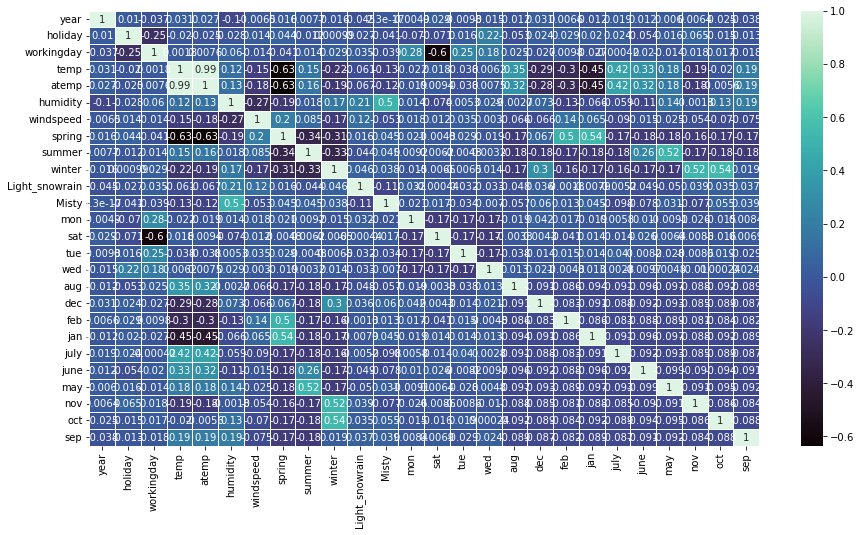

In [593]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot = True, cmap="mako",linewidth =1)
plt.show()

In [594]:
print('The Durbin-Watson value for Final Model lr2 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))


The Durbin-Watson value for Final Model lr2 is 2.0158


Text(0.5, 0, 'Errors')

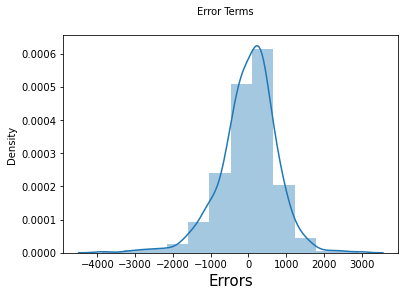

In [595]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 10)
plt.xlabel('Errors', fontsize = 15)

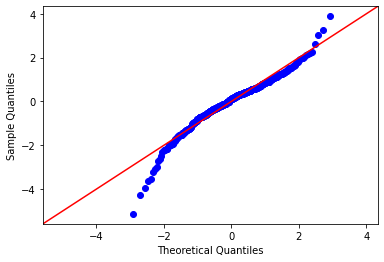

In [596]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Making Predictions Using the Final Model

In [597]:
num_columns=['temp','humidity','windspeed']
bike_test[num_columns] = scaler.transform(bike_test[num_columns])

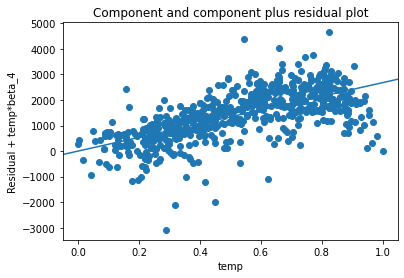

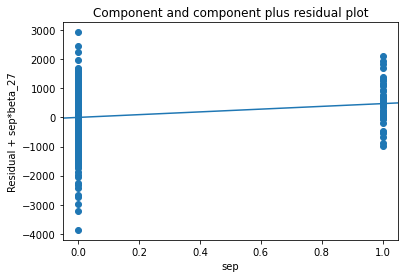

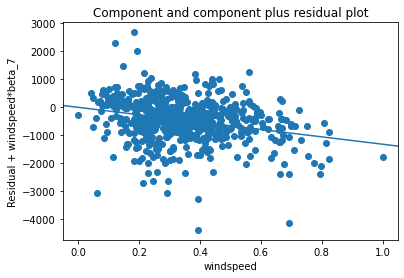

In [598]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

In [599]:
bike_test.describe()

year     holiday  workingday          temp       atemp  \
count  146.000000  146.000000  146.000000  1.460000e+02  146.000000   
mean     0.500000    0.027397    0.726027 -1.303018e-01    0.238797   
std      0.501721    0.163800    0.447530  7.809291e-09    0.083540   
min      0.000000    0.000000    0.000000 -1.303018e-01    0.040740   
25%      0.000000    0.000000    0.000000 -1.303018e-01    0.167208   
50%      0.500000    0.000000    1.000000 -1.303018e-01    0.244442   
75%      1.000000    0.000000    1.000000 -1.303017e-01    0.302756   
max      1.000000    1.000000    1.000000 -1.303017e-01    0.414403   

           humidity     windspeed      spring      summer      winter  ...  \
count  1.460000e+02  1.460000e+02  146.000000  146.000000  146.000000  ...   
mean   7.203282e-09 -4.762712e-02    0.260274    0.191781    0.287671  ...   
std    1.731521e-09  4.371267e-09    0.440294    0.395057    0.454235  ...   
min    2.953433e-09 -4.762712e-02    0.000000    0.000000    0.000000  ...   
25%    5.825765e-09 -4.762712e-02    0.000000    0.000000    0.000000  ...   
50%    6.962351e-09 -4.762712e-02    0.000000    0.000000    0.000000  ...   
75%    8.336178e-09 -4.762711e-02    1.000000    0.000000    1.000000  ...   
max    1.130050e-08 -4.762710e-02    1.000000    1.000000    1.000000  ...   

              dec         feb         jan        july        june         mar  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.102740    0.089041    0.082192    0.102740    0.054795    0.068493   
std      0.304664    0.285783    0.275602    0.304664    0.228362    0.253460   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              may         nov         oct         sep  
count  146.000000  146.000000  146.000000  146.000000  
mean     0.061644    0.102740    0.095890    0.095890  
std      0.241335    0.304664    0.295454    0.295454  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

Dividing the data into X_test and y_test

In [600]:
y_test = bike_test.pop('cnt')
X_test = bike_test

KeyError: 'cnt'

In [601]:
X_test.shape

(146, 28)

In [602]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [603]:
X_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'spring', 'summer', 'winter', 'Light_snowrain', 'Misty',
       'mon', 'sat', 'tue', 'wed', 'aug', 'dec', 'feb', 'jan', 'july', 'june',
       'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [604]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['mar','june','oct','thu','sun','workingday','sat',
             'aug','wed','may','feb']
X_test_m = X_test_m.drop(drop_cols, axis = 1)

KeyError: "['thu'] not found in axis"

Validating the assumption of Linear Regression Model :
check the various assumptions
. Linear Relationship . Homoscedasticity . Absence of Multicollinearity . Independence of residuals . Normality of Errors

In [605]:
Linear Relationship

SyntaxError: invalid syntax (Temp/ipykernel_20528/1023347107.py, line 1)

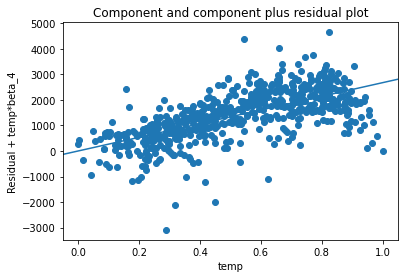

In [606]:
sm.graphics.plot_ccpr(lr_7, 'temp')
plt.show()

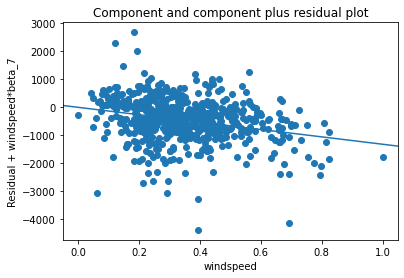

In [607]:
sm.graphics.plot_ccpr(lr_7, 'windspeed')
plt.show()

Inferencess: . The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

Homoscedasticity

In [608]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
# Plot heading 
plt.xlabel('y_test', fontsize = 18)                          
# X-label
plt.ylabel('y_pred', fontsize = 16)

NameError: name 'y_pred_m' is not defined

<Figure size 432x288 with 0 Axes>

In [609]:
col1 = X_train.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [610]:
# Applying scaling on the test dataset

num_vars = ['temp','atemp', 'windspeed']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

year  holiday  workingday      temp     atemp      humidity  windspeed  \
310     0        0           1 -0.130302  0.002128  8.816713e-09  -0.047627   
320     0        0           0 -0.130302  0.001716  6.691209e-09  -0.047627   
189     0        0           1 -0.130302  0.003526  7.078551e-09  -0.047627   
382     1        0           1 -0.130302  0.001461  5.151552e-09  -0.047627   
388     1        0           1 -0.130302  0.001854  9.712422e-09  -0.047627   

     spring  summer  winter  ...  dec  feb  jan  july  june  mar  may  nov  \
310       0       0       1  ...    0    0    0     0     0    0    0    1   
320       0       0       1  ...    0    0    0     0     0    0    0    1   
189       0       0       0  ...    0    0    0     1     0    0    0    0   
382       1       0       0  ...    0    0    1     0     0    0    0    0   
388       1       0       0  ...    0    0    1     0     0    0    0    0   

     oct  sep  
310    0    0  
320    0    0  
189    0    0  
382    0    0  
388    0    0  

[5 rows x 29 columns]

In [611]:
bike_test.describe()

year     holiday  workingday          temp       atemp  \
count  146.000000  146.000000  146.000000  1.460000e+02  146.000000   
mean     0.500000    0.027397    0.726027 -1.303018e-01    0.002461   
std      0.501721    0.163800    0.447530  2.489338e-10    0.000861   
min      0.000000    0.000000    0.000000 -1.303018e-01    0.000420   
25%      0.000000    0.000000    0.000000 -1.303018e-01    0.001723   
50%      0.500000    0.000000    1.000000 -1.303018e-01    0.002519   
75%      1.000000    0.000000    1.000000 -1.303018e-01    0.003120   
max      1.000000    1.000000    1.000000 -1.303018e-01    0.004270   

           humidity     windspeed      spring      summer      winter  ...  \
count  1.460000e+02  1.460000e+02  146.000000  146.000000  146.000000  ...   
mean   7.203282e-09 -4.762713e-02    0.260274    0.191781    0.287671  ...   
std    1.731521e-09  1.345014e-10    0.440294    0.395057    0.454235  ...   
min    2.953433e-09 -4.762713e-02    0.000000    0.000000    0.000000  ...   
25%    5.825765e-09 -4.762713e-02    0.000000    0.000000    0.000000  ...   
50%    6.962351e-09 -4.762713e-02    0.000000    0.000000    0.000000  ...   
75%    8.336178e-09 -4.762713e-02    1.000000    0.000000    1.000000  ...   
max    1.130050e-08 -4.762713e-02    1.000000    1.000000    1.000000  ...   

              dec         feb         jan        july        june         mar  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.102740    0.089041    0.082192    0.102740    0.054795    0.068493   
std      0.304664    0.285783    0.275602    0.304664    0.228362    0.253460   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              may         nov         oct         sep  
count  146.000000  146.000000  146.000000  146.000000  
mean     0.061644    0.102740    0.095890    0.095890  
std      0.241335    0.304664    0.295454    0.295454  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [ ]:
col1=X_train.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_11 = sm.add_constant(X_test)

X_test_lm_11.info()

In [559]:
X_test_lm_11.columns

Index(['const', 'year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'spring', 'summer', 'winter', 'Light_snowrain', 'Misty',
       'mon', 'sat', 'sun', 'tue', 'wed', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

Text(0, 0.5, 'y_pred')

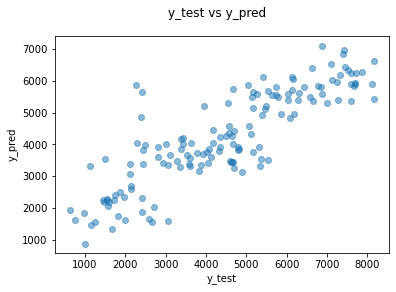

In [560]:
#plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

R2 Value Calculation for data_test dataframe


In [617]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
r2

0.7057

In [ ]:
R2 Value Calculation for data_train dataframe

In [618]:
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))

Train R-Score:  0.845542530665139


Adjusted R2 Value Calculation for bike_test dataframe

In [619]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.6414

Adjusted R2 Value Calculation for data_train dataframe

In [620]:
# n is number of rows in train dataset
n = X_train.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.6414


Adjusted R-squared more than 0.69 is a very good value for showing the accuracy. In some cases, Adjusted R-squared of 0.4 or more is acceptable as well.

Calculating RMSE for the selected Model

In [621]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

1086.4357

In [622]:
Calculating Mean Absolute Error for the selected Model

SyntaxError: invalid syntax (Temp/ipykernel_20528/315106757.py, line 1)

In [623]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

860.636

In [637]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['spring', 'summer', 'winter', 'dec',
       'jan', 'july', 'nov', 'sep', 'mon',
       'tue', 'Misty', 'year',
       'holiday', 'temp', 'humidity', 'windspeed']
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     158.5
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          4.23e-197
Time:                        18:42:09   Log-Likelihood:                -4746.5
No. Observations:                 584   AIC:                             9527.
Df Residuals:                     567   BIC:                             9601.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3882.3612    307.427     12.629      0.0

Model Outcome Summary

All the positive coefficients like temp,Summer indicate that an increase in these values will lead to an increase in the value of cnt.

Analysing the above model, the comapany should focus on the following features:
. Company should focus on expanding business during Spring. . Company should focus on expanding business during September. . Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019. . There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

Significant variables to predict the demand for shared bikes
Demand of bikes depend on year, holiday, temp, months - . months(January, July, September, November, December) . Year (2019) . Monday and Tuesday, Monday and Tuesday, jan, Light_snowrain, Misty, spring, summer and winter.